<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/notebook_2/Day_18_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Method       | Main Idea                                                                       | Examples                    | Weakness                            | Strength                                          |
| ------------ | ------------------------------------------------------------------------------- | --------------------------- | ----------------------------------- | ------------------------------------------------- |
| **Bagging**  | Train same model on **different subsets** of data → combine by averaging/voting | RandomForest                | Doesn’t reduce bias (just variance) | Reduces variance, stable                          |
| **Boosting** | Train models **sequentially**, each fixes previous mistakes                     | XGBoost, AdaBoost, LightGBM | Can overfit, slower                 | Reduces bias, very accurate                       |
| **Stacking** | Train **different models**, then combine with a meta-model                      | StackingClassifier          | More complex, slower                | Can capture patterns better than bagging/boosting |


RandomForest Accuracy: 0.9722222222222222
XGBoost Accuracy: 0.9694444444444444
Logistic Regression Accuracy: 0.975
Stacking Accuracy: 0.975


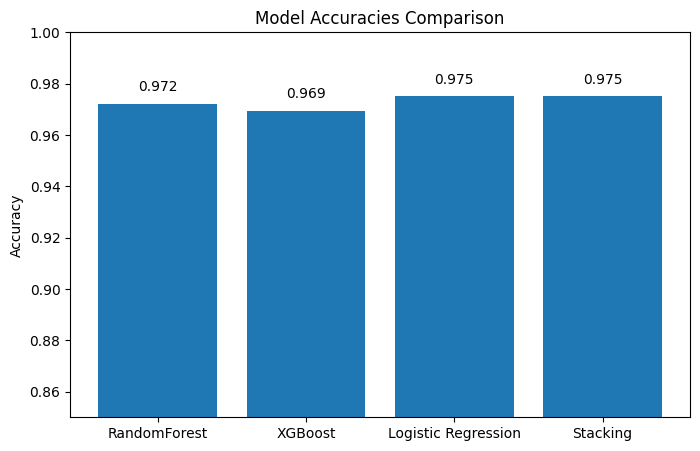

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load data
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, eval_metric='mlogloss')
log_reg = LogisticRegression(max_iter=1000)
'''# Base models (we can also impliment the base models in one parameter)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, eval_metric='mlogloss'))
]'''
# Train base models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predictions
rf_acc = accuracy_score(y_test, rf.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
log_acc = accuracy_score(y_test, log_reg.predict(X_test))

print("RandomForest Accuracy:", rf_acc)
print("XGBoost Accuracy:", xgb_acc)
print("Logistic Regression Accuracy:", log_acc)

# Stacking model
stack = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)
stack.fit(X_train, y_train)

stack_acc = accuracy_score(y_test, stack.predict(X_test))
print("Stacking Accuracy:", stack_acc)


# --- Visualization ---
models = ["RandomForest", "XGBoost", "Logistic Regression", "Stacking"]
accuracies = [rf_acc, xgb_acc, log_acc, stack_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.ylim(0.85, 1.0)
plt.title("Model Accuracies Comparison")
plt.ylabel("Accuracy")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center')
plt.show()